In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier  

Classification Model Libraries

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier  

# **Read Original Data**

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
df = pd.read_csv("heart_2020_raw.csv")
df.head()

,Unnamed: 0,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,X_METSTAT,X_URBSTAT,MSCODE,X_STSTR,X_STRWT,X_RAWRAKE,X_WT2RAKE,X_IMPRACE,X_CHISPNC,X_CRACE1,X_CPRACE,X_CLLCPWT,X_DUALUSE,X_DUALCOR,X_LLCPWT2,X_LLCPWT,X_RFHLTH,X_PHYS14D,X_MENT14D,X_HCVU651,X_TOTINDA,X_MICHD,X_LTASTH1,X_CASTHM1,X_ASTHMS1,X_DRDXAR2,X_EXTETH3,X_ALTETH3,X_DENVST3,X_PRACE1,X_MRACE1,X_HISPANC,X_RACE,X_RACEG21,X_RACEGR3,X_RACEPRV,X_SEX,X_AGEG5YR,X_AGE65YR,X_AGE80,X_AGE_G,HTIN4,HTM4,WTKG3,X_BMI5,X_BMI5CAT,X_RFBMI5,X_CHLDCNT,X_EDUCAG,X_INCOMG,X_SMOKER3,X_RFSMOK3,DRNKANY5,DROCDY3_,X_RFBING5,X_DRNKWK1,X_RFDRHV7,X_FLSHOT7,X_PNEUMO3,X_RFSEAT2,X_RFSEAT3,X_DRNKDRV,X_RFMAM22,X_MAM5023,X_RFPAP35,X_RFPSA23,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4
0,1,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10,1,1.0,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,NaN,NaN,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,NaN,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,NaN,NaN,1,1,9,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,2,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
df.columns

Index(['Unnamed: 0', 'X_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR',
       'DISPCODE', 'SEQNO', 'X_PSU',
       ...
       'X_RFPSA23', 'X_CLNSCPY', 'X_SGMSCPY', 'X_SGMS10Y', 'X_RFBLDS4',
       'X_STOLDNA', 'X_VIRCOLN', 'X_SBONTIM', 'X_CRCREC1', 'X_AIDTST4'],
      dtype='object', length=280)

In [4]:
df.isnull().sum().tail(20).sort_values(ascending=False)

X_MAM5023    306666
X_RFPAP35    304555
X_RFPSA23    275354
X_FLSHOT7    256096
X_PNEUMO3    256096
X_RFMAM22    235983
X_SGMSCPY    230472
X_SGMS10Y    230472
X_VIRCOLN    227684
X_CRCREC1    226260
X_RFBLDS4    226105
X_STOLDNA    225601
X_CLNSCPY    224036
X_SBONTIM    207741
X_AIDTST4     34037
X_RFDRHV7         0
X_DRNKDRV         0
X_RFSEAT3         0
X_RFSEAT2         0
X_DRNKWK1         0
dtype: int64

# **Select Columns Based on MetaData**

In [5]:
new_df = df[['X_MICHD','X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH','ADDEPEV3','SLEPTIM1','ASTHMA3','X_MENT14D',
             'CHCKDNY2','CHCSCNCR','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
new_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,2.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,2.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,2.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,2.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [6]:
pd.options.mode.chained_assignment = None
new_df["X_MICHD"] = new_df["X_MICHD"].replace({2: 0, 1: 1})
#0 no 1 Yes
new_df["X_MICHD"].unique()

array([ 0.,  1., nan])

In [7]:
new_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,0.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,0.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,0.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,0.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,0.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [8]:
df2 = new_df
df2.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,0.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,0.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,0.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,0.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,0.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [9]:
df2.shape

(401958, 21)

# **Functions**

In [10]:
#Function to Replcae Null Values
def blank_value(list1):
    for i in list1:
        if i in cat_list:
            df2[i].fillna(df2[i].mode()[0], inplace=True)
        elif i in conti_list:
            df2[i].fillna(df2[i].median(), inplace=True)

In [11]:
#Function to Fill Resufused and Don't Know Values 
def fill_dont_know(list1):
    for p in list1:
        
        if p == cols_9:
            
            for i in p:
                df2[i].mask(df2[i] == 9, df2[i].mode()[0], inplace=True)
        elif p == cols_7:
            for j in p:
                df2[j].mask(df2[j] == 7, df2[j].mode()[0], inplace=True)
        elif p == cols_99_77:
            for k in p:
                df2[k].mask(df2[k] == 77, df2[k].median(), inplace=True)
                df2[k].mask(df2[k] == 99, df2[k].median(), inplace=True)

In [33]:
def draw_roc_curve(model):
    dt_probs = model.predict_proba(X_test)
    dt_probs = dt_probs[:, 1]
    dt_auc = roc_auc_score(y_test, dt_probs)
    dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
    model_name = type(model).__name__
    plt.plot(dt_fpr, dt_tpr, marker='.', label='--'+model_name+' (AUC = %0.3f)' % dt_auc)
    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend() 
    plt.show()

In [57]:
def draw_precision_recall_curve(model):
    plot_precision_recall_curve(model, X_test, y_test)
    plt.legend(loc='best')
    plt.show()

In [58]:
def model_eval(model):
    y_pred_test= model.predict(X_test)
    score=accuracy_score(y_pred_test,y_test)
    print("Test Score = ",score)
    
    y_pred_train= model.predict(X_train)
    score1=accuracy_score(y_pred_train,y_train)
    print("Train Score = ",score1)
    
    y_pred_proba = model.predict_proba(X_test)[:,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("Auc Value = ",auc)
    
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


    print('Recall: %.3f' % recall_score(y_test, y_pred_test))
    print('Precision: %.3f' % precision_score(y_test, y_pred_test))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred_test))
    
    

In [15]:
def save_model(model):
    model_name = type(model).__name__
    name = model_name + '.pkl'
    with open(name, 'wb') as files:
        pickle.dump(model, files)

# Missing Values

In [14]:
cat_list = ['X_BMI5CAT','X_MICHD','GENHLTH','CHCKDNY2','CHCCOPD2','ADDEPEV3','MARITAL','DIFFWALK',
        'CVDSTRK3','EXERANY2','ASTHMA3','CHCOCNCR','CHCSCNCR','CVDINFR4']
conti_list=['SLEPTIM1']

In [15]:
blank_value(cat_list)
blank_value(conti_list)

In [16]:
for i in new_df.columns:
    print(i,new_df[i].unique())

X_MICHD [0. 1.]
X_BMI5CAT [1. 3. 2. 4.]
X_SMOKER3 [1 9 4 3 2]
CVDSTRK3 [2. 1. 7. 9.]
SEXVAR [2 1]
CVDINFR4 [2. 7. 1. 9.]
X_AGE_G [5 6 3 4 1 2]
X_IMPRACE [1 2 3 4 6 5]
EXERANY2 [1. 2. 7. 9.]
GENHLTH [2. 3. 1. 4. 5. 7. 9.]
ADDEPEV3 [1. 2. 9. 7.]
SLEPTIM1 [ 5.  7.  6.  8. 12.  4.  9. 10. 15.  1. 77. 99.  3.  2. 16. 11. 18. 14.
 13. 20. 24. 17. 19. 21. 22. 23.]
ASTHMA3 [1. 2. 7. 9.]
X_MENT14D [3 1 2 9]
CHCKDNY2 [2. 1. 7. 9.]
CHCSCNCR [1. 2. 7. 9.]
X_PHYS14D [2 1 3 9]
CHCOCNCR [1. 2. 7. 9.]
CHCCOPD2 [1. 2. 7. 9.]
MARITAL [2. 3. 1. 4. 5. 6. 9.]
DIFFWALK [2. 1. 7. 9.]


In [17]:
df2.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
SLEPTIM1     0
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

In [18]:
cols_9 = ['X_SMOKER3','X_PHYS14D','X_MENT14D', 'MARITAL','CVDSTRK3','EXERANY2','GENHLTH','ASTHMA3',
          'CHCKDNY2','CHCSCNCR','CHCOCNCR','CHCCOPD2','ADDEPEV3','DIFFWALK','CVDINFR4']
cols_7 = ['CVDSTRK3','EXERANY2','GENHLTH','ASTHMA3','CHCKDNY2','CHCSCNCR','CVDINFR4','CHCOCNCR','CHCCOPD2','ADDEPEV3',
          'DIFFWALK']
cols_99_77 = ['SLEPTIM1']
cols=[cols_9,cols_7,cols_99_77]

In [19]:
fill_dont_know(cols)

In [20]:
for i in new_df.columns:
    print(i,new_df[i].unique())

X_MICHD [0. 1.]
X_BMI5CAT [1. 3. 2. 4.]
X_SMOKER3 [1 4 3 2]
CVDSTRK3 [2. 1.]
SEXVAR [2 1]
CVDINFR4 [2. 1.]
X_AGE_G [5 6 3 4 1 2]
X_IMPRACE [1 2 3 4 6 5]
EXERANY2 [1. 2.]
GENHLTH [2. 3. 1. 4. 5.]
ADDEPEV3 [1. 2.]
SLEPTIM1 [ 5.  7.  6.  8. 12.  4.  9. 10. 15.  1.  3.  2. 16. 11. 18. 14. 13. 20.
 24. 17. 19. 21. 22. 23.]
ASTHMA3 [1. 2.]
X_MENT14D [3 1 2]
CHCKDNY2 [2. 1.]
CHCSCNCR [1. 2.]
X_PHYS14D [2 1 3]
CHCOCNCR [1. 2.]
CHCCOPD2 [1. 2.]
MARITAL [2. 3. 1. 4. 5. 6.]
DIFFWALK [2. 1.]


# EDA

Text(0, 0.5, 'Count')

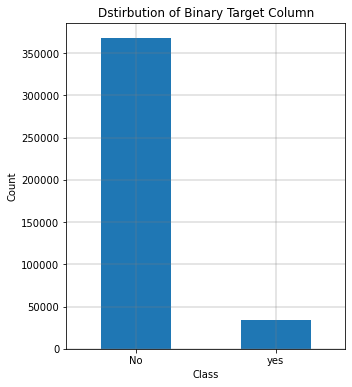

In [21]:
df2['X_MICHD'].value_counts().plot(kind='bar', figsize=(5,6), rot=0)
plt.title("Dstirbution of Binary Target Column")
plt.xticks(range(2), ['No','yes'])
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Class")
plt.ylabel("Count")

In [22]:
binary_variables = [i  for i in df2.columns  if (len(df2[i].unique()) == 2)]
#binary_variables.append("store_room")
binary_variables

['X_MICHD',
 'CVDSTRK3',
 'SEXVAR',
 'CVDINFR4',
 'EXERANY2',
 'ADDEPEV3',
 'ASTHMA3',
 'CHCKDNY2',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD2',
 'DIFFWALK']

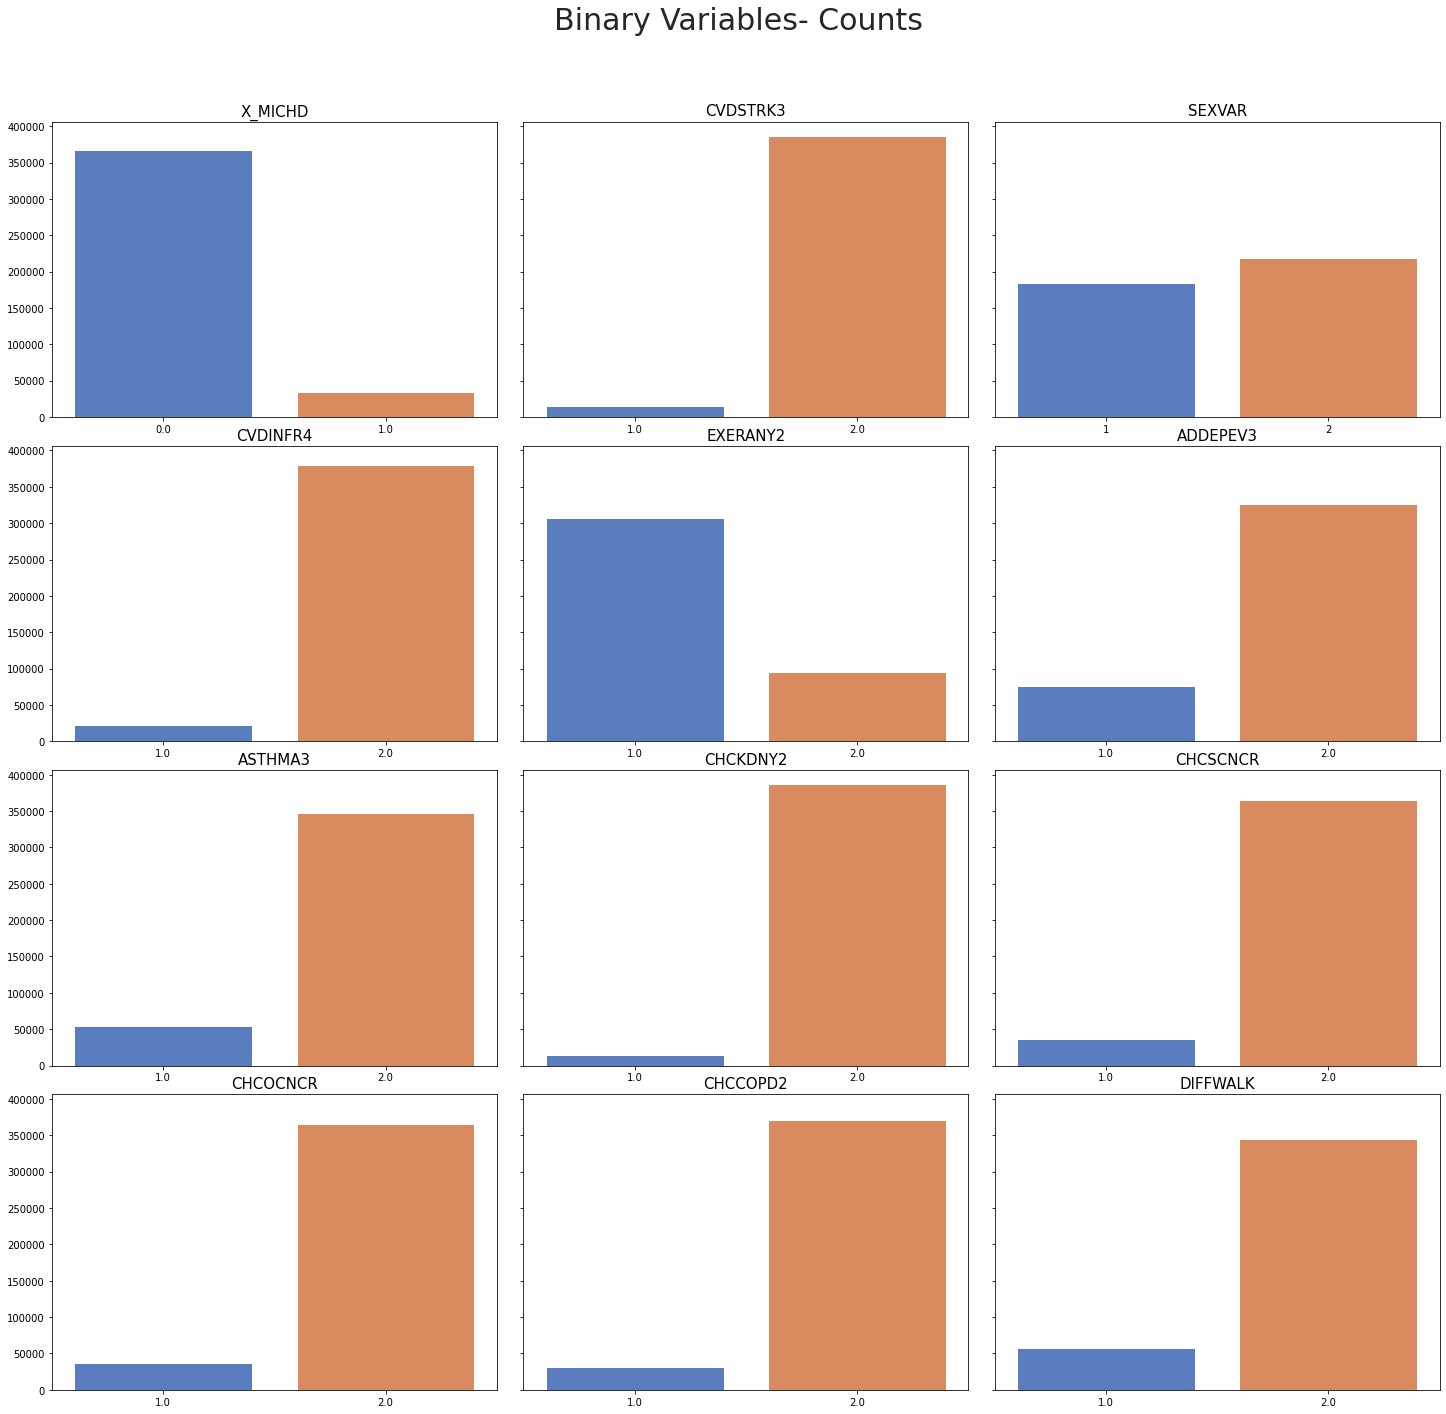

In [32]:
j=4
k=3
def bin_plots(bin_var,df2):
    i = 0

    fig, ax = plt.subplots(j,k, figsize = (20,20), sharey = True)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)

    sns.set_style('white')
    fig.suptitle('Binary Variables- Counts', size = 30)
    for a in range(0,j):
        
        for b in range(0,k):
            sns.barplot(ax=ax[a,b],data =df2 , x = df2[bin_var[i]].value_counts().index, y = df2[bin_var[i]].value_counts().values,palette= 'muted') #,hue=df2[bin_var[i]].unique()
            ax[a,b].set_title(bin_var[i], fontsize = 15)
            i = i + 1
            if i==12:
                break
                
        #print(df2[i].value_counts())
bin_plots(binary_variables,df2)

In [33]:
ordinal_variables= [i for i in df2.columns if ((len(df2[i].unique()) > 2 ) and (len(df2[i].unique()) <= 6))]

ordinal_variables

['X_BMI5CAT',
 'X_SMOKER3',
 'X_AGE_G',
 'X_IMPRACE',
 'GENHLTH',
 'X_MENT14D',
 'X_PHYS14D',
 'MARITAL']

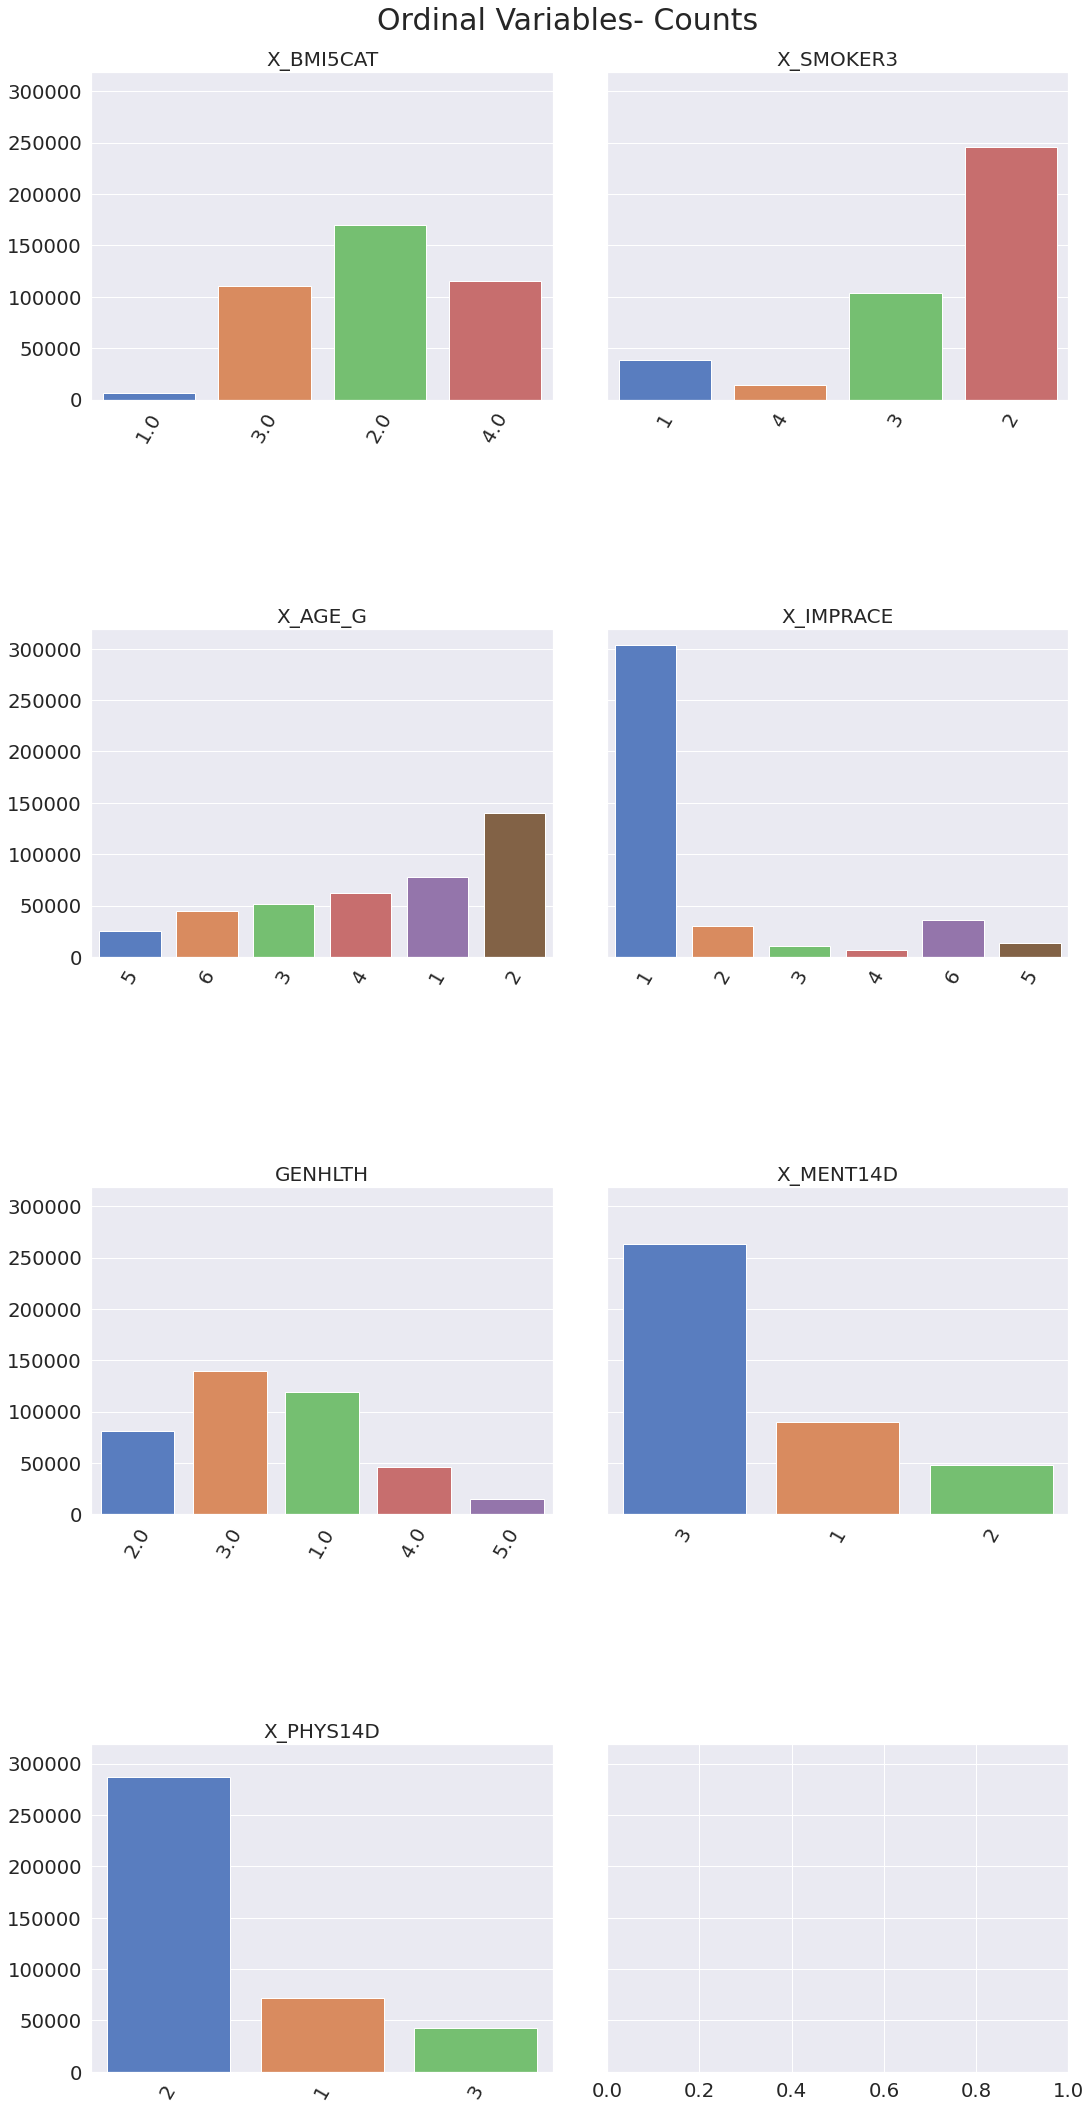

In [34]:
j=4
k=2
sns.set(font_scale=1.8)
def ord_plots(ord_var,df2):
    i = 0

    fig, ax = plt.subplots(j,k, figsize = (15,30), sharey = True)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.subplots_adjust(hspace = 0.7)
    sns.set_style('white')
    fig.suptitle('Ordinal Variables- Counts', size = 30)
    for a in range(0,j):
        
        for b in range(0,k):
            g=sns.barplot(ax=ax[a,b],data =df2 , x = df2[ord_var[i]].value_counts().index, y = df2[ord_var[i]].value_counts().values,palette= 'muted'
                       )
            g.set_xticklabels(labels=df2[ord_var[i]].unique(),rotation=60)
            ax[a,b].set_title(ord_var[i], fontsize = 20)
            i = i + 1
            if i==7:
                break
ord_plots(ordinal_variables,df2)

# X and Y Split

In [23]:
X=df2.drop('X_MICHD',axis=1)
Y=df2['X_MICHD']

print(X.shape,Y.shape)

(401958, 20) (401958,)


In [24]:
Yes = df2[df2['X_MICHD']==1]

No = df2[df2['X_MICHD']==0]

In [25]:
Yes.shape,No.shape

((34163, 21), (367795, 21))

# Balance dataset

In [26]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(1)
X_res,y_res=os.fit_resample(X, Y)


**chi square Test**

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_res,y_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by='Score',ascending=[False])

,Specs,Score
5,X_AGE_G,55894.034854
8,GENHLTH,53041.707517
4,CVDINFR4,45469.948913
15,X_PHYS14D,15270.768878
19,DIFFWALK,6478.709409
18,MARITAL,4687.570348
6,X_IMPRACE,3819.980646
1,X_SMOKER3,3195.866503
7,EXERANY2,3126.566530
17,CHCCOPD2,3046.045500


In [28]:
print(featureScores.nlargest(15,'Score'))

        Specs         Score
5     X_AGE_G  55894.034854
8     GENHLTH  53041.707517
4    CVDINFR4  45469.948913
15  X_PHYS14D  15270.768878
19   DIFFWALK   6478.709409
18    MARITAL   4687.570348
6   X_IMPRACE   3819.980646
1   X_SMOKER3   3195.866503
7    EXERANY2   3126.566530
17   CHCCOPD2   3046.045500
3      SEXVAR   1822.911307
2    CVDSTRK3   1781.905460
0   X_BMI5CAT   1176.777108
13   CHCKDNY2    919.687537
16   CHCOCNCR    919.075955


In [27]:
X_res = X_res[['X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH',
             'CHCKDNY2','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
X_res.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,2.0,2,1.0,1.0,2.0,2.0
1,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,1,2.0,2.0,3.0,2.0
2,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,1,1.0,2.0,1.0,2.0
3,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,1,2.0,2.0,3.0,2.0


# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=0)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((492845, 15), (242745, 15), (492845,), (242745,))

In [52]:
# rf = RandomForestClassifier(random_state=0)
# rf.fit(X_train,y_train)
# rf.predict(X_test)
# model_eval(rf)

Model List

In [53]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Gradient Boosting',GradientBoostingClassifier(learning_rate=0.1)])
models.append(['XGBoost', XGBClassifier()])

In [54]:
print(models)

[['Logistic Regreesion', LogisticRegression(class_weight='balanced', max_iter=10000)], ['GaussianNB', GaussianNB()], ['BernoulliNB', BernoulliNB()], ['Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)], ['Random Forest', RandomForestClassifier(random_state=0)], ['Gradient Boosting', GradientBoostingClassifier()], ['XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree

In [55]:
from sklearn.model_selection import cross_val_score

Model- LogisticRegression(class_weight='balanced', max_iter=10000)
Test accuracy_score -  0.8515643988547653
Recall -  0.7833035398011384
precision -  0.9071966263726827
 f1 -  0.8407101554349171


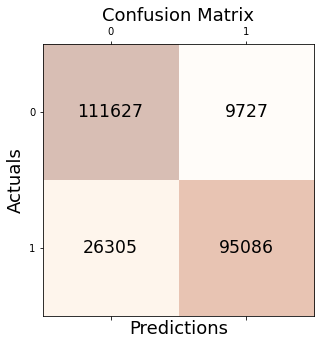

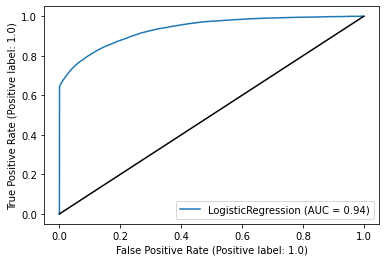

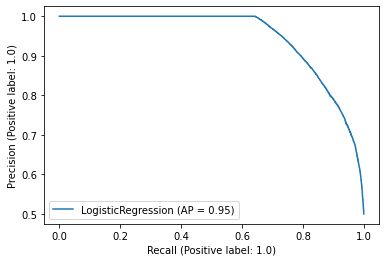

Model- GaussianNB()
Test accuracy_score -  0.8395888689777339
Recall -  0.7311415179049517
precision -  0.9337022386803568
 f1 -  0.8200991466733196


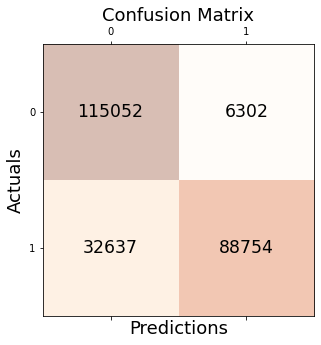

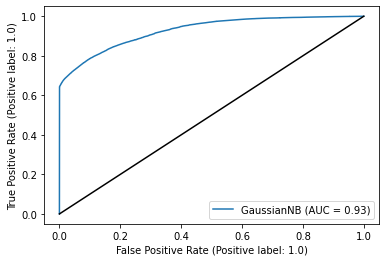

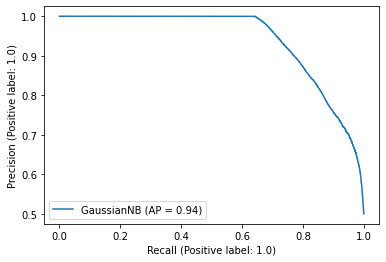

C:\Users\dubil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model- BernoulliNB()
Test accuracy_score -  0.49992378833755585
Recall -  0.0
precision -  0.0
 f1 -  0.0


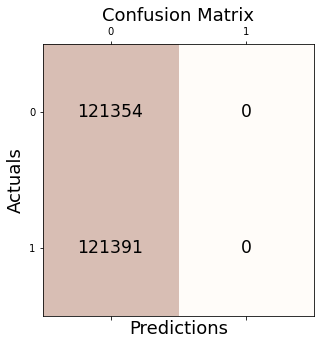

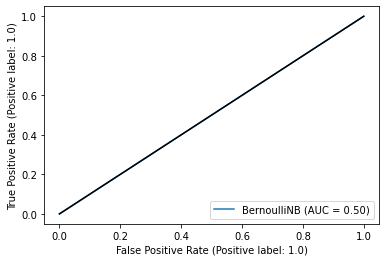

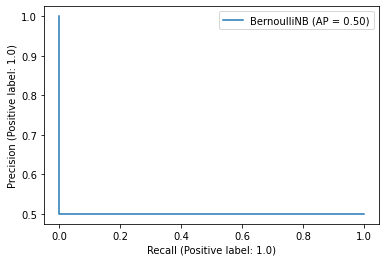

Model- DecisionTreeClassifier(criterion='entropy', random_state=0)
Test accuracy_score -  0.910350367669777
Recall -  0.9002726726034055
precision -  0.9188168924088413
 f1 -  0.9094502604730124


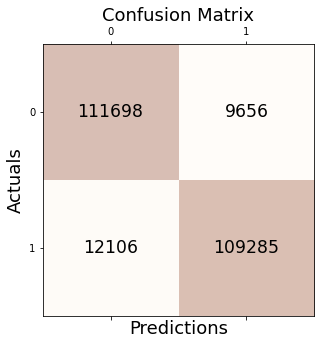

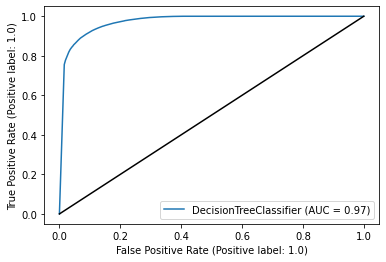

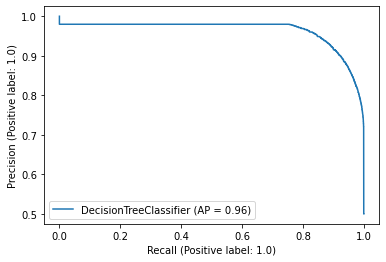

Model- RandomForestClassifier(random_state=0)
Test accuracy_score -  0.9158788028589673
Recall -  0.9023321333542025
precision -  0.9274845680319055
 f1 -  0.9147354795607332


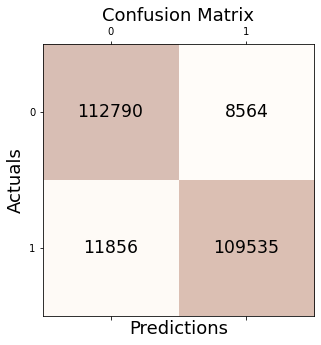

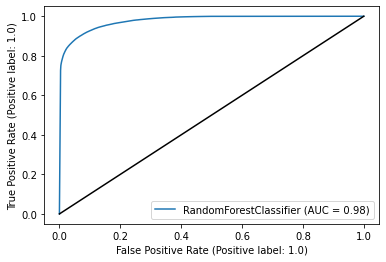

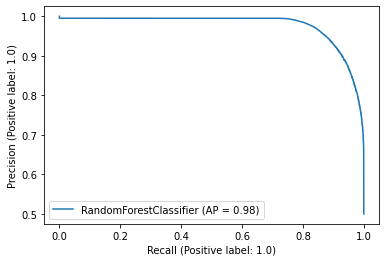

Model- GradientBoostingClassifier()
Test accuracy_score -  0.8547776473253826
Recall -  0.8033050226128791
precision -  0.8955358208818154
 f1 -  0.8469167969428522


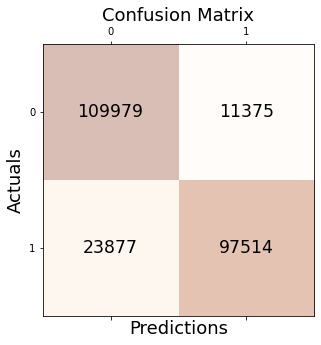

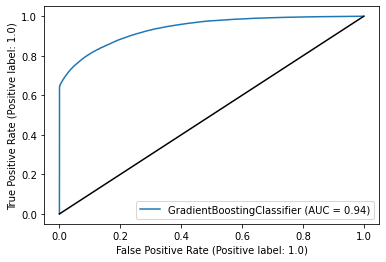

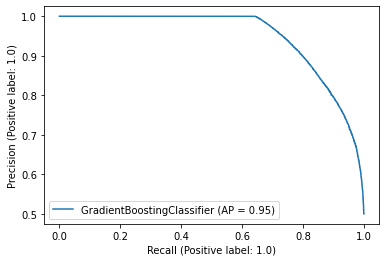

Model- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Test accuracy_score -  0.8641413829327071
Recall -  0.8239161058068555
precision -  0.8960401361763125
 f1 -  0.8584659093347524


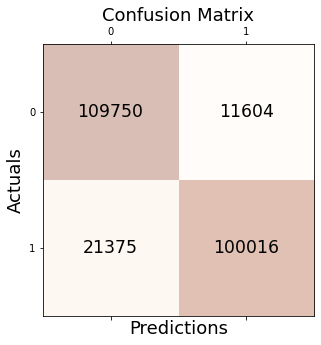

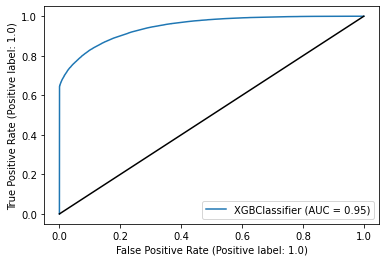

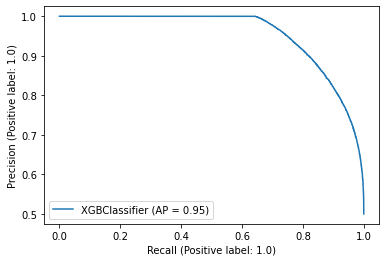

In [65]:
lst_1 = []
for i in range(len(models)):
    lst_2=[]
    model = models[i][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm=confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, y_pred_proba) 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Model-",models[i][1])
    print("Test accuracy_score - ",accuracy_score(y_test, y_pred))
    print("Recall - ",recall)
    print("precision - ",precision)
    print(" f1 - ",f1)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
    for k in range(cm.shape[0]):
        for p in range(cm.shape[1]):
            ax.text(x=p, y=k,s=cm[k, p], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0,1], [0,1], c='k')
    plt.show()
    
    plot_precision_recall_curve(model, X_test, y_test)
    #plt.plot([0,1], [0.2035,0.2035],c='k')
    plt.legend(loc='best')
    plt.show()
    
    lst_2.append(models[i][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [66]:
df3 = pd.DataFrame(lst_1, columns= ['Model', 'Test Accuracy' ,'ROC AUC', 'Precision', 'Recall', 'F1'])

In [67]:
df3.sort_values(by= ['F1','Recall', 'Precision'], inplace= True, ascending= False)

In [56]:
df3

,Model,Test Accuracy,ROC AUC,Precision,Recall,F1
4,Random Forest,91.730005,0.978130,0.928127,0.904378,0.916099
3,Decision Tree,91.180045,0.973186,0.920541,0.901110,0.910722
6,XGBoost,86.574389,0.947634,0.896849,0.826084,0.860013
5,Gradient Boosting,85.615770,0.939355,0.894935,0.806560,0.848452
0,Logistic Regreesion,85.278379,0.936924,0.907237,0.785419,0.841945
1,GaussianNB,84.194937,0.929067,0.936335,0.733267,0.822452
2,BernoulliNB,49.922758,0.500000,0.499228,1.000000,0.665980


In [68]:
df3

,Model,Test Accuracy,ROC AUC,Precision,Recall,F1
4,Random Forest,91.587880,0.977458,0.927485,0.902332,0.914735
3,Decision Tree,91.035037,0.972110,0.918817,0.900273,0.909450
6,XGBoost,86.414138,0.946546,0.896040,0.823916,0.858466
5,Gradient Boosting,85.477765,0.937993,0.895536,0.803305,0.846917
0,Logistic Regreesion,85.156440,0.935611,0.907197,0.783304,0.840710
1,GaussianNB,83.958887,0.927553,0.933702,0.731142,0.820099
2,BernoulliNB,49.992379,0.500000,0.000000,0.000000,0.000000


**Grid Search**

In [48]:
grid_models = [(LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000),[{'C':[0.25,0.5,1],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'max_depth': [6,8],'criterion':['gini','entropy'],'random_state':[0]}]),
               (GradientBoostingClassifier(),[{"learning_rate": [0.01, 0.025], "max_depth":[3,5], "max_features":["log2","sqrt"],
                   "criterion": ["friedman_mse",  "squared_error"], "subsample":[0.5, 0.618],"n_estimators":[10] }]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression(class_weight='balanced', max_iter=10000):
Best Accuracy : 87.38%
Best Parameters :  {'C': 1, 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 87.71%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 66.59%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 90.49%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 88.61%
Best Parameters :  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 150, 'random_state': 0}

----------------



In [49]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

GradientBoostingClassifier():
Best Accuracy : 66.59%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10, 'subsample': 0.5}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...):
Best Accuracy : 88.77%
Best Paramete

In [69]:
models1 = []
models1.append(['Logistic Regreesion', LogisticRegression(solver='lbfgs',class_weight='balanced', C=1,random_state=0,max_iter=10000)])
models1.append(['GaussianNB', GaussianNB()])
models1.append(['BernoulliNB', BernoulliNB(alpha= 0.25)])
models1.append(['Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)])
models1.append(['Random Forest', RandomForestClassifier(criterion='gini', max_depth=25, max_features='sqrt', n_estimators=100,random_state=0)])
models1.append(['Gradient Boosting',GradientBoostingClassifier(learning_rate=0.01,max_depth=3,max_features='log2',n_estimators=100,
                                                             subsample=0.5 )])
models1.append(['XGBoost', XGBClassifier(eval_metric='error',learning_rate=0.1)])

Model- LogisticRegression(C=1, class_weight='balanced', max_iter=10000, random_state=0)
Test accuracy_score -  0.8515643988547653
Recall -  0.7833035398011384
precision -  0.9071966263726827
 f1 -  0.8407101554349171


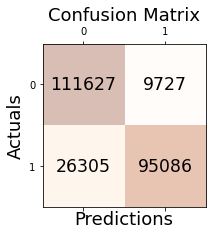

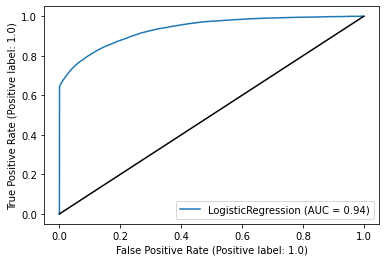

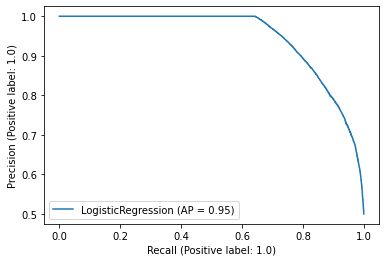

Model- GaussianNB()
Test accuracy_score -  0.8395888689777339
Recall -  0.7311415179049517
precision -  0.9337022386803568
 f1 -  0.8200991466733196


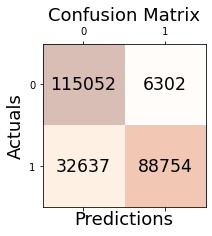

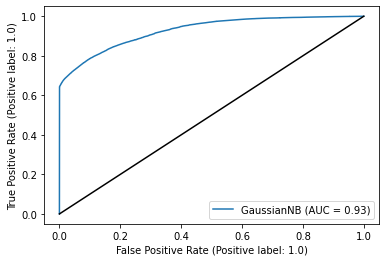

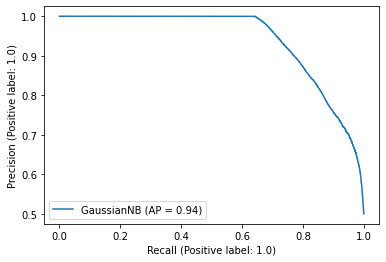

C:\Users\dubil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model- BernoulliNB(alpha=0.25)
Test accuracy_score -  0.49992378833755585
Recall -  0.0
precision -  0.0
 f1 -  0.0


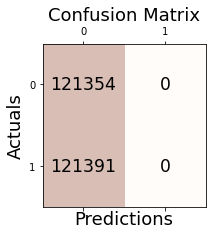

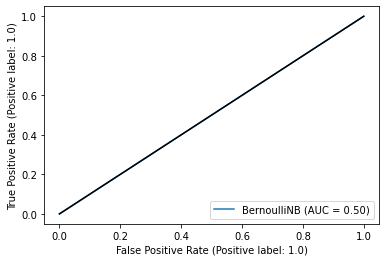

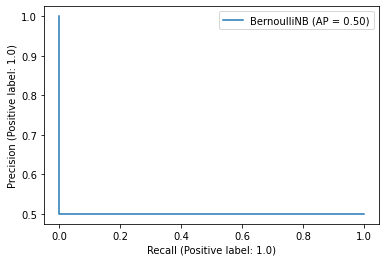

Model- DecisionTreeClassifier(criterion='entropy', random_state=0)
Test accuracy_score -  0.910350367669777
Recall -  0.9002726726034055
precision -  0.9188168924088413
 f1 -  0.9094502604730124


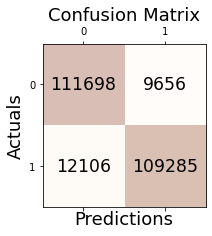

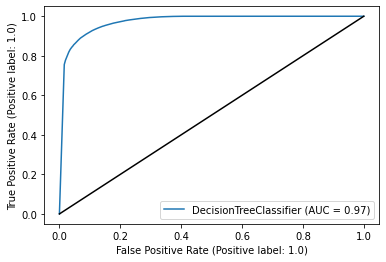

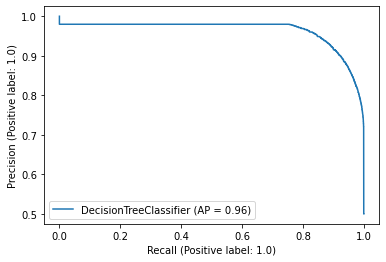

Model- RandomForestClassifier(max_depth=25, random_state=0)
Test accuracy_score -  0.9157057817874724
Recall -  0.9021920900231484
precision -  0.9272778074119231
 f1 -  0.9145629608597985


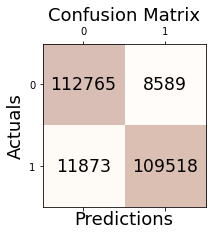

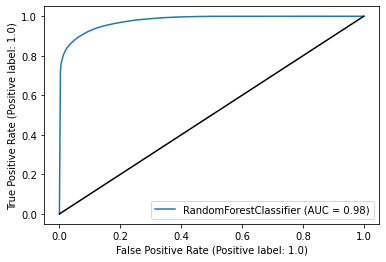

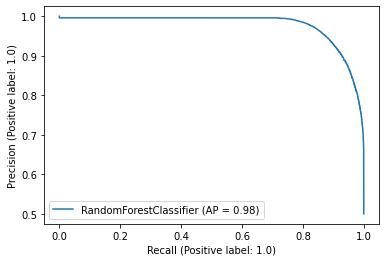

Model- GradientBoostingClassifier(learning_rate=0.01, max_features='log2',
                           subsample=0.5)
Test accuracy_score -  0.8463861253578858
Recall -  0.7788798181084264
precision -  0.9005009714655796
 f1 -  0.8352864784638694


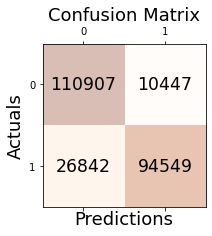

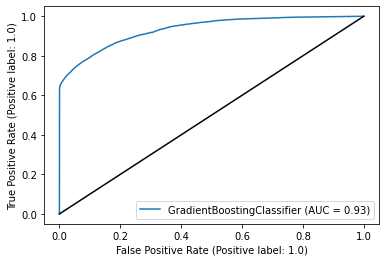

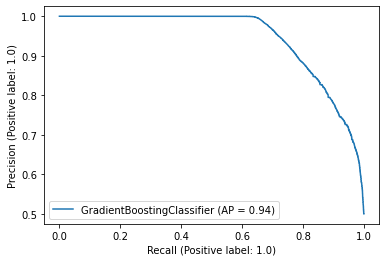

Model- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Test accuracy_score -  0.8579826566973573
Recall -  0.8081983013567727
precision -  0.8976111400836239
 f1 -  0.8505613594000606


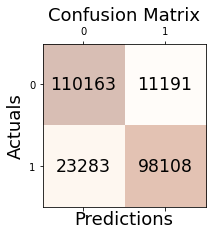

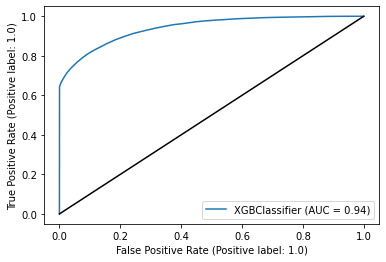

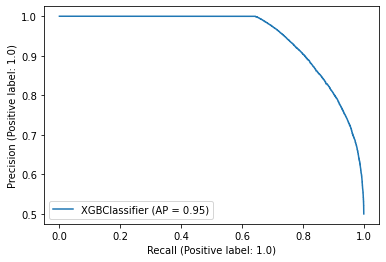

In [76]:
lst_11 = []
for i in range(len(models)):
    lst_2=[]
    model = models1[i][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #y_pred_train = model.predict(X_train)
    cm=confusion_matrix(y_test, y_pred)
    #kfold_validation=KFold(3)
    #accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold_validation)
    #accuracies=accuracy_score(y_pred_test,y_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, y_pred_proba) 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Model-",models1[i][1])
    print("Test accuracy_score - ",accuracy_score(y_test, y_pred))
    #print("Train accuracy_score - ",accuracy_score(y_pred_train,y_train))
    print("Recall - ",recall)
    print("precision - ",precision)
    print(" f1 - ",f1)
    
    #print(cm)
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
    for k in range(cm.shape[0]):
        for p in range(cm.shape[1]):
            ax.text(x=p, y=k,s=cm[k, p], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0,1], [0,1], c='k')
    plt.show()
    
    plot_precision_recall_curve(model, X_test, y_test)
    plt.legend(loc='best')
    plt.show()
    
    lst_2.append(models1[i][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_11.append(lst_2)

In [77]:
df4 = pd.DataFrame(lst_11, columns= ['Model', 'Test Accuracy' ,'ROC AUC', 'Precision', 'Recall', 'F1'])

In [78]:
df4.sort_values(by= ['F1','Recall', 'Precision'], inplace= True, ascending= False)

In [79]:
df4

,Model,Test Accuracy,ROC AUC,Precision,Recall,F1
4,Random Forest,91.570578,0.977695,0.927278,0.902192,0.914563
3,Decision Tree,91.035037,0.972110,0.918817,0.900273,0.909450
6,XGBoost,85.798266,0.940927,0.897611,0.808198,0.850561
0,Logistic Regreesion,85.156440,0.935611,0.907197,0.783304,0.840710
5,Gradient Boosting,84.638613,0.933111,0.900501,0.778880,0.835286
1,GaussianNB,83.958887,0.927553,0.933702,0.731142,0.820099
2,BernoulliNB,49.992379,0.500000,0.000000,0.000000,0.000000
